# FRUITS CLASSIFICATION PROJECT
* In this notebook we will try to classify diffrent fruits using machine learning.

## PROBLEM STATMENT:-
* How can we classify diffrent kind of fruits with given data?

## DATA:
* We have two datasets Training and Testing 
* Each contains 81 folders means 81 classes of fruits
* In Training set we have 450-500 images of each class
* In testing set 150-200 images for each class

## Goal:
* We will try to get 90+ accuracy   

## Architecture
* We will try to build architecture like vgg But smaller



### Importing requred tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# directories for train and test set
train_dir = "/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Training"
test_dir ="/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Test"

### Data Augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)


In [5]:
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  subset="training")
valid_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  subset = "validation",)
test_set = test_datagen.flow_from_directory(test_dir,target_size=(224,224),shuffle=False)

Found 33078 images belonging to 81 classes.
Found 8244 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [23]:
unique_labels = []

x = train_dataset.class_indices
for name, i in x.items():
    unique_labels.append(name)

unique_labels

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Red',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach Flat',
 'Pear',
 'Pear Abate',
 'Pear Monster',
 'Pear Williams',
 'Pepino',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Pomegr

### We Will Visualize datasets in pie

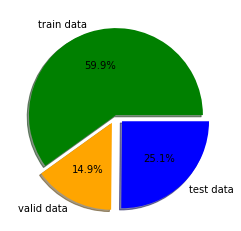

In [ ]:
train_len= len(train_dataset)
valid_len = len(valid_dataset)
test_len = len(test_set)

labels=["train data", "valid data", "test data"]
values =[train_len, valid_len, test_len]
colors = ["green","orange","blue"]

plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,explode=(0,0.1,0.1));

In [ ]:
from IPython.display import Image,display

def show_image(filepath):
   
   for i in range(2):
  
        im = Image("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Training/"+filepath[i])

        display(im)


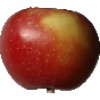

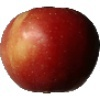

In [ ]:
show_image(train_dataset.filenames)

## Build CNN


Import required tools

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, MaxPool2D, Flatten

In [ ]:
# initialize IMAGE SIZE and classes
IMG_SIZE=224
NUM_CLASSES=81

def build_little_vgg():
    model = tf.keras.Sequential([

                    # First conv layer 
                    Conv2D(64,kernel_size=3,activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,3)),
                    BatchNormalization(),

                    # second conv layer
                    Conv2D(64,(3,3),activation="relu"),
                    BatchNormalization(),

                    # pooling with dropout
                    MaxPool2D(),
                    Dropout(0.2),

                    # third conv layer
                    Conv2D(128,(3,3),activation="relu"),
                    BatchNormalization(),


                    # forth conv layer
                    Conv2D(128,(3,3),activation="relu"),
                    BatchNormalization(),


                    # maxpooling with droupout
                    MaxPool2D(),
                    Dropout(0.2),

                    # fifth conv layer 
                    Conv2D(256,(3,3),activation="relu"),
                    BatchNormalization(),


                    # sixth conv layer 
                    Conv2D(256,(3,3),activation="relu"),
                    BatchNormalization(),

                     # maxpooling with droupout
                    MaxPool2D(),
                    Dropout(0.2),

                    # seventh
                    Conv2D(256,(3,3),activation="relu"),


                    # eighth conv layer 
                    Conv2D(512,(3,3),activation="relu"),
                    BatchNormalization(),

                    # nineth conv layer
                    Conv2D(256,(3,3),activation="relu"),
                    BatchNormalization(),

                    # maxpooling with droupout
                    MaxPool2D(),
                    Dropout(0.2),

                    
                    # Flatten layer
                    Flatten(),

                    # First FC layer
                    Dense(256,activation="relu"),
                    BatchNormalization(),
                    Dropout(0.5),
                    
                    # second FC layer
                    Dense(128,activation="relu"),
                    BatchNormalization(),
                    Dropout(0.5),

                    # Output layer
                    Dense(units=NUM_CLASSES,activation="softmax")])
  
    # compile model
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics='accuracy')

    model.build()

    return model

In [ ]:
little_vgg = build_little_vgg()

In [ ]:
little_vgg.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_66 (Batc (None, 222, 222, 64)      256       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
batch_normalization_67 (Batc (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 108, 108, 128)    

In [ ]:
## Define callbackes

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/callback'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/logs'),
]

In [ ]:
nb_train_samples=33078
nb_validation_samples = 8244 
batch_size=32

little_vgg.fit(train_dataset,
               steps_per_epoch=nb_train_samples//batch_size,
               validation_data=valid_dataset,
               validation_steps=nb_validation_samples//batch_size,
               epochs=10,
               callbacks=my_callbacks)

Epoch 1/10
1033/1033 [==============================] - 1036s 988ms/step - loss: 2.9408 - accuracy: 0.2772 - val_loss: 1.2693 - val_accuracy: 0.6611
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Fruits classifier/callback/assets
Epoch 2/10
1033/1033 [==============================] - 1017s 984ms/step - loss: 0.7161 - accuracy: 0.7808 - val_loss: 0.5103 - val_accuracy: 0.8419
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Fruits classifier/callback/assets
Epoch 3/10
1033/1033 [==============================] - 1017s 984ms/step - loss: 0.3835 - accuracy: 0.8779 - val_loss: 0.4540 - val_accuracy: 0.8617
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Fruits classifier/callback/assets
Epoch 4/10
1033/1033 [==============================] - 1021s 988ms/step - loss: 0.2728 - accuracy: 0.9130 - val_loss: 1.8580 - val_accuracy: 0.6817
INFO:tensorflow:Assets written to: /content/drive/

In [ ]:
little_vgg.save("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/saved models")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine learning/Projects/Fruits classifier/saved models/assets


## As we have already done training  we will simply load the saved model

In [8]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/saved models")

In [ ]:
model.evaluate(valid_dataset,verbose=1,)

258/258 [==============================] - 2121s 8s/step - loss: 0.3677 - accuracy: 0.9043


[0.3676563501358032, 0.9042940139770508]

In [ ]:
predictions = model.predict(valid_dataset,verbose=1)
np.save("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/validation_prediction",predictions)

258/258 [==============================] - 3349s 13s/step


In [7]:
predictions= np.load("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/validation_prediction.npy")
predictions.dtype

dtype('float32')

In [34]:
test_predictions= model.predict(test_set,verbose=1)

434/434 [==============================] - 3751s 9s/step


In [35]:
np.save("/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/test_predictions",test_predictions)

In [37]:
np.round(test_predictions)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [38]:
test_set.classes

array([ 0,  0,  0, ..., 80, 80, 80], dtype=int32)

In [43]:
def get_label(prediction_probabilities):
   '''
   takes numpy array and returns label of highest probability
   '''
   return  unique_labels[np.argmax(prediction_probabilities)]

In [44]:
get_label(test_predictions[1])

'Apple Braeburn'

## visualize the predictions
* to visualize this we need confidence score, true labels and predicted labes
* We have confidence score== test_probabilities
* get true labels from test set  

In [71]:
labels=[]

for i in range(len(test_set.labels)):
    labels.append(test_set.labels[i])

true_labels=[]
for i in range(len(test_set.labels)):
  true_labels.append(unique_labels[labels[i]])

In [72]:
len(true_labels)

13877

In [74]:
len(np.unique(true_labels))

81

In [77]:
img = ["/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Test/"+fname for fname in test_set.filenames]
img[:3]

['/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Test/Apple Braeburn/321_100.jpg',
 '/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Test/Apple Braeburn/322_100.jpg',
 '/content/drive/MyDrive/Machine learning/Projects/Fruits classifier/Data/fruits-360/Test/Apple Braeburn/323_100.jpg']

In [82]:
def plot_predictions(prediction_probabilities,labels,images,n=1):
    
    pred_probs,actual_label, real_image = prediction_probabilities[n],labels[n],images[n]

    pred_labels= get_label(pred_probs)
    
    # plot image
    x = plt.imread(real_image)
    plt.imshow(x)

    if pred_labels == actual_label:
       color = "green"
    else:
       color = "red"   

    # give title as predictions and actual 
    plt.title("Prediction-{:.2f} {} || Actual- {}".format(np.max(pred_probs)*100,
                                             pred_labels,
                                             actual_label),
                                             color = color)

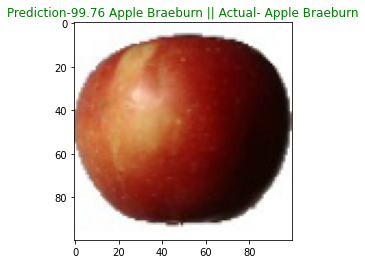

In [83]:
plot_predictions(test_predictions,true_labels,img)

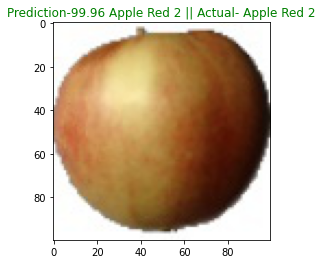

In [104]:
plot_predictions(test_predictions,true_labels,img,n=988)


In [108]:
y_preds = []

for i in range(len(test_predictions)):
    x = get_label(test_predictions[i])
    y_preds.append(x)

In [111]:
from sklearn.metrics import confusion_matrix

cfm_metrics = confusion_matrix(true_labels,y_preds)
cfm_metrics

array([[135,   0,   0, ...,   0,   0,   0],
       [  0, 164,   0, ...,   0,   0,   0],
       [  0,   6, 158, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 164,   0,   0],
       [  0,   0,   0, ...,   0, 127,   0],
       [  0,   0,   0, ...,   0,   0, 249]])

Text(249.0, 0.5, 'Predicted')

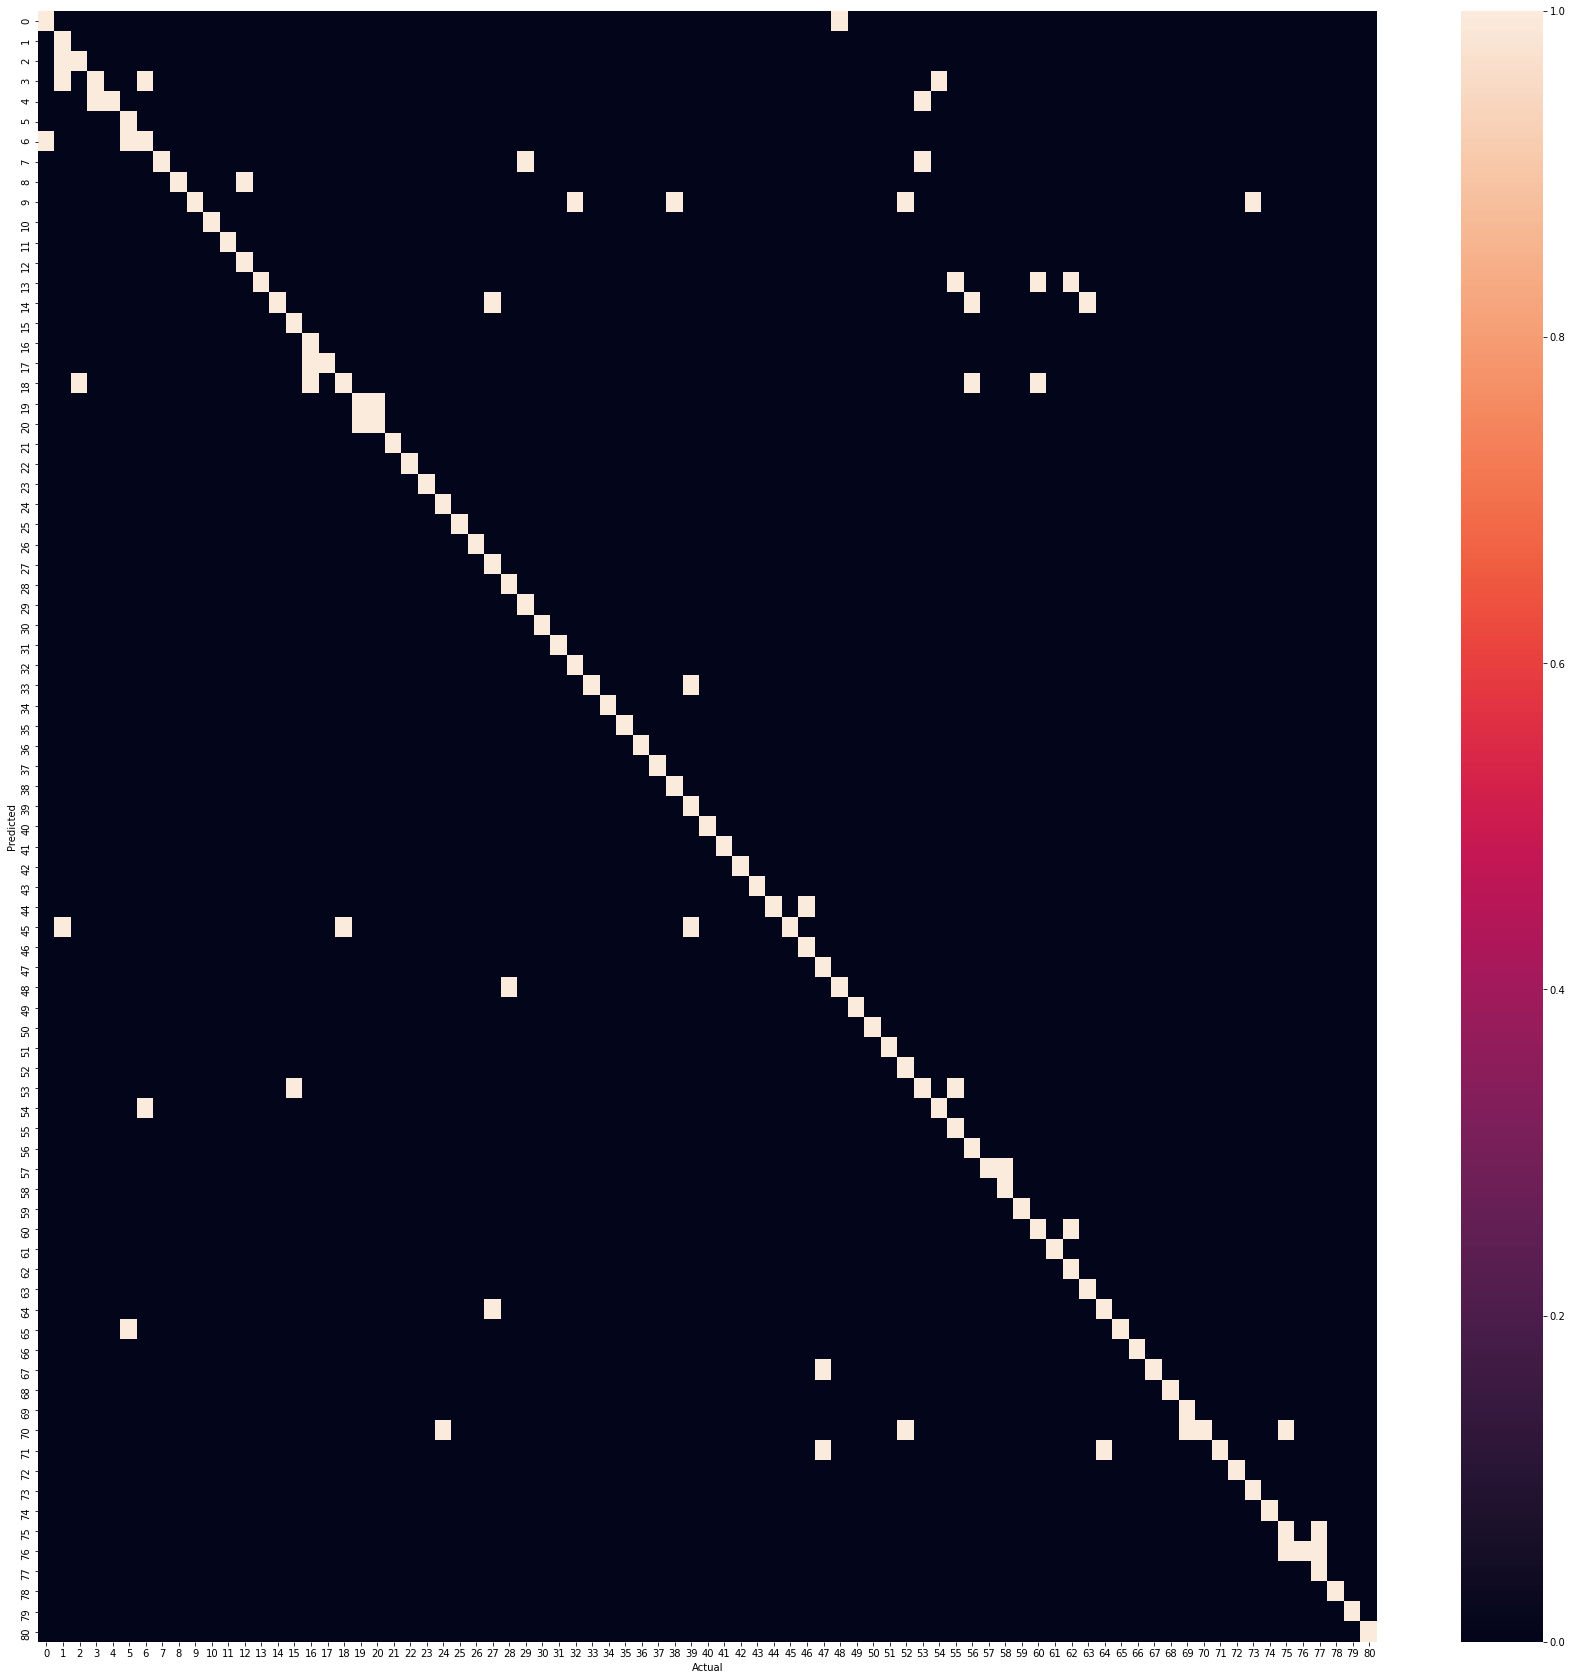

In [124]:
## Visulization of confustion_matrics
plt.figure(figsize=(30,30))
ax=sns.heatmap(data=cfm_metrics,robust=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")